# Long Term Stock Price growth prediction using NLP on 10K Financial Reports 


In [1]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/driver


## Import Libraries


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import urllib.request
import re
import string
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt

import random
random.seed(123)
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Load the data

In [0]:
data_train=pd.read_csv("/content/driver/My Drive/phd_data/Extracted_all_url.csv")
data_test=pd.read_csv("/content/driver/My Drive/phd_data/Extracted_test_url.csv")

### Making a copy of the load data

In [0]:
df_train = data_train.copy()
df_test = data_test.copy()

**Web Scraping the data of 10-K financial report from each url which consist of identifying information about the company and the target variable**

In [0]:
# start = '<TYPE>10-K'
# end = '</DOCUMENT>'
# ext_txt = []

In [0]:
# def find_between(s, start, end):
#   return (s.split(start))[1].split(end)[0]

In [0]:
# %%time
# url = data_test['10k_link']
# for i,j in enumerate(url): 
#   try:
#     print(i,j)
#     req = urllib.request.Request(j)
#     resp = urllib.request.urlopen(req)
#     resp_data = resp.read()
#     resp_data = resp_data.decode('utf-8')
#     ext_txt = find_between(resp_data,start,end)
#     soup = bs(ext_txt, 'lxml')
#     text= soup.find_all(text=True)
#     tag_list = ['a','sequence','filename','description']
#     result =""
#     for t in text:
#       if t.parent.name not in tag_list:
#         result += '{} '.format(t)

#   except:
#     pass
  
#   data_test.loc[i, 'Extracted_data_test'] = result

0 https://www.sec.gov/Archives/edgar/data/40533/000119312512066385/0001193125-12-066385.txt
1 https://www.sec.gov/Archives/edgar/data/36270/0001047469-99-010544.txt
2 https://www.sec.gov/Archives/edgar/data/315852/000095015201001323/0000950152-01-001323.txt
3 https://www.sec.gov/Archives/edgar/data/920148/000092014809000015/0000920148-09-000015.txt
4 https://www.sec.gov/Archives/edgar/data/96021/000095012904007097/0000950129-04-007097.txt
5 https://www.sec.gov/Archives/edgar/data/732717/000073271706000008/0000732717-06-000008.txt
6 https://www.sec.gov/Archives/edgar/data/1613103/000161310316000093/0001613103-16-000093.txt
7 https://www.sec.gov/Archives/edgar/data/36270/000095012311016289/0000950123-11-016289.txt
8 https://www.sec.gov/Archives/edgar/data/851968/0000931763-00-000482.txt
9 https://www.sec.gov/Archives/edgar/data/879101/000143774917003269/0001437749-17-003269.txt
10 https://www.sec.gov/Archives/edgar/data/75362/0000912057-00-012263.txt
11 https://www.sec.gov/Archives/edgar

### Understanding the data

In [5]:
df_train.head()

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data
0,FE,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti..."
1,CL,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti..."
2,PRU,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti..."
3,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,\n 1\n\n- ---------------------------------...
4,CAM,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,\n e10vk \n PAGEBREAK \n \n \n \n \n SEC...


In [6]:
df_test.head()

,id,ticker,cik,filing_date,10k_link,Extracted_data_test
0,0,GD,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,\n Form 10-K \n \n \n \n \n UNITED STA...
1,1,MTB,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,\n \n\n\n UNI...
2,2,RRC,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,\n Range Resources Corporation Form 10-K for 1...
3,3,LH,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,\n \n UNITED STATES \n SECURITIES AND EXCHAN...
4,4,SYY,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,\n \n\n- -------------------------------------...


In [7]:
df_train.dtypes

ticker               object
cik                   int64
filing_date          object
10k_link             object
long_term_outlook     int64
Extracted_data       object
dtype: object

In [8]:
df_train.shape

(2568, 6)

In [9]:
df_train.isnull().sum()

ticker               0
cik                  0
filing_date          0
10k_link             0
long_term_outlook    0
Extracted_data       0
dtype: int64

**Saving the webscraped data to text file (Contingency plan - Just in case the html page is not available to scrape )**

In [0]:
# pd.DataFrame(data_test).to_csv("Extracted_test_url.csv",sep=',', columns=['id','ticker','cik','filing_date','10k_link','Extracted_data_test'], header=True, index=False)

In [0]:
# dtest = pd.read_csv("Extracted_test_url.csv", sep= ',')
# dtest.head()

,id,ticker,cik,filing_date,10k_link,Extracted_data_test
0,0,GD,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,\n Form 10-K \n \n \n \n \n UNITED STA...
1,1,MTB,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,\n \n\n\n UNI...
2,2,RRC,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,\n Range Resources Corporation Form 10-K for 1...
3,3,LH,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,\n \n UNITED STATES \n SECURITIES AND EXCHAN...
4,4,SYY,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,\n \n\n- -------------------------------------...


### Duplicating the original text extracted before proceeeding with preprocessing steps

In [11]:
import copy
print(type(df_train['Extracted_data']))
original_data = copy.deepcopy(df_train)
print(df_train.keys())
print(original_data.keys())

# import copy
# print(type(df_test['Extracted_data_test']))
# original_data = copy.deepcopy(df_test)
# print(df_test.keys())
# print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['ticker', 'cik', 'filing_date', '10k_link', 'long_term_outlook',
       'Extracted_data'],
      dtype='object')
Index(['ticker', 'cik', 'filing_date', '10k_link', 'long_term_outlook',
       'Extracted_data'],
      dtype='object')


**Distribution of target variable**

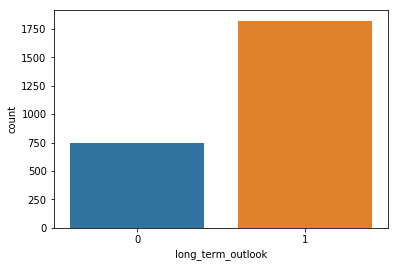

1    1821
0     747
Name: long_term_outlook, dtype: int64
Percentage of companies whose stock prices have grown: 70.91121495327103 %


In [12]:
# Plot Distribution
import seaborn as sns
sns.countplot(x='long_term_outlook',data=data_train)
plt.show()

# What are the counts?
print(data_train.long_term_outlook.value_counts())

# What is the percentage?
count_yes = len(data_train[data_train.long_term_outlook == 1])
count_no = len(data_train[data_train.long_term_outlook != 1])

percent_success = (count_yes/(count_yes + count_no))*100
print('Percentage of companies whose stock prices have grown:', percent_success, "%")

**Most of the companies have an increased stock price 6 months from the data of filing.**

**Numbers of stocks filed wrt to year**

In [0]:
#Plot distribution
#df_train['filing_year'] = df_train['filing_date'].str.split('-').str[0]

df_test['filing_date'] = pd.to_datetime(df_test['filing_date'])
df_test['filing_year'] = df_test['filing_date'].dt.year

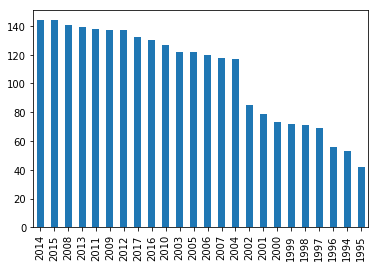

In [82]:
df_train['filing_year'].value_counts().plot(kind='bar')

**The number of filings per year have an increasing trend in train_data since 1995**

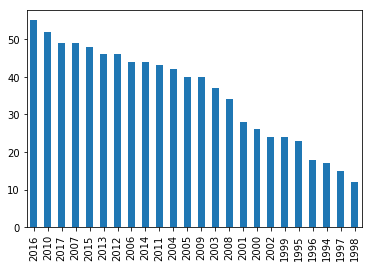

In [85]:
df_test['filing_year'].value_counts().plot(kind='bar')

**The number of filings per year have an increasing trend in test_data since 1998**

**Representation of WorldCloud wrt to target variable**

The word cloud below represent the words/terms which may or may not be used to define the stock price prediction, hence it represents positive terms helps in stock price Prediction as well as some negative terms which may not be acclimated to define the stock price Prediction.

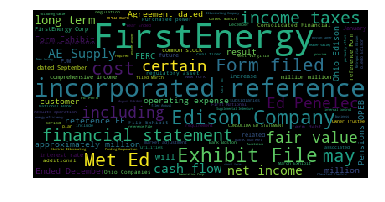

In [15]:
from wordcloud import WordCloud #Target variable as 0
wordcloud = WordCloud().generate(data_train['Extracted_data'][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

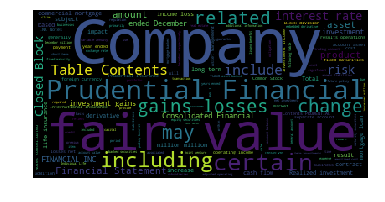

In [16]:
from wordcloud import WordCloud #Target variable as 1
wordcloud = WordCloud().generate(data_train['Extracted_data'][2])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

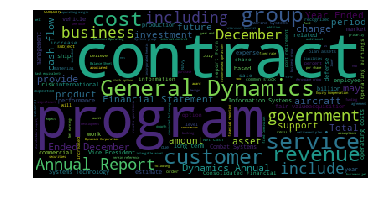

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(data_test['Extracted_data_test'][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

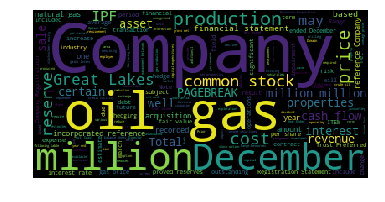

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(data_test['Extracted_data_test'][2])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Valuable Insights**
Top 50 most frequent words are common for both levels in the target variable. Considering the next 30 most frequent words, insights gained are:

1. Companies with increased stock prices tend to have certain positive words   such as "benefit","increase","return" etc.
2. Companies with decreased stock prices tend to have certain negative words such as "decrease","expense" etc.
3. The most occuring words present in both the graphs are fairly different.

**Stock variation/situation Year-wise**

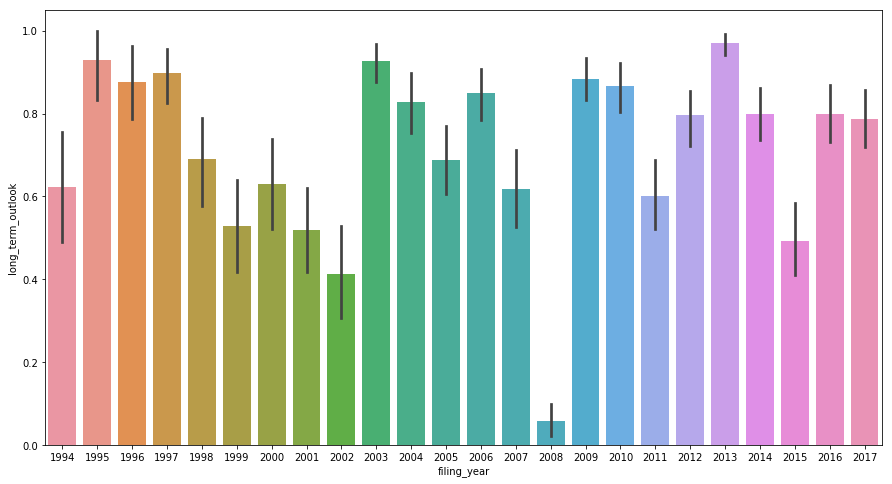

In [19]:
#Plot distribution
plt.figure(figsize=(15,8))
sns.barplot(x='filing_year',y='long_term_outlook',data=data_train)

1. Since 1995, the stocks have a decreasing trend till 2002, probably due to the burst of the dot com bubble.
2. An abnormality can be noticed in 2008 indicating the crash of the stock market during the recession period.

In [23]:
df_train.head()

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data,filing_year
0,FE,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti...",2012
1,CL,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti...",2015
2,PRU,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,"\n html PUBLIC ""-//W3C//DTD HTML 4.01 Transiti...",2016
3,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,\n 1\n\n- ---------------------------------...,2001
4,CAM,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,\n e10vk \n PAGEBREAK \n \n \n \n \n SEC...,2005


## Basic Preprocessing and Data Cleaning steps

### Number of characters
Here, we calculate the number of characters in each extracted_data wrt URL. This is done by calculating the length of the particular URL extracted_data.

In [25]:
# df_train['char_count'] = df_train['Extracted_data'].str.len() ## this also includes spaces
# df_train[['Extracted_data','char_count']].head()

df_test['char_count'] = df_test['Extracted_data_test'].str.len() ## this also includes spaces
df_test[['Extracted_data_test','char_count']].head()

,Extracted_data_test,char_count
0,\n Form 10-K \n \n \n \n \n UNITED STA...,384856
1,\n \n\n\n UNI...,459221
2,\n Range Resources Corporation Form 10-K for 1...,250576
3,\n \n UNITED STATES \n SECURITIES AND EXCHAN...,387734
4,\n \n\n- -------------------------------------...,314394


### Number of Words
One of the most basic features we can extract is the number of words in each extracted data with respect to URL for 10-k reports. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the split function in python:

In [27]:
# df_train['word_count'] = [len(text.split(' ')) for text in df_train['Extracted_data']]
# df_train[['Extracted_data','word_count']].head()

df_test['word_count'] = [len(text.split(' ')) for text in df_test['Extracted_data_test']]
df_test[['Extracted_data_test','word_count']].head()

,Extracted_data_test,word_count
0,\n Form 10-K \n \n \n \n \n UNITED STA...,81075
1,\n \n\n\n UNI...,156159
2,\n Range Resources Corporation Form 10-K for 1...,46048
3,\n \n UNITED STATES \n SECURITIES AND EXCHAN...,95215
4,\n \n\n- -------------------------------------...,90769


In [28]:
df_train['word_count'].describe()

count      2568.000000
mean      92715.301012
std       76231.271227
min        4984.000000
25%       46057.500000
50%       75903.500000
75%      117461.750000
max      640796.000000
Name: word_count, dtype: float64

In [29]:
df_test['word_count'].describe()

count       856.000000
mean      91714.702103
std       75495.531303
min        8534.000000
25%       43810.750000
50%       75770.500000
75%      116063.250000
max      554115.000000
Name: word_count, dtype: float64

In [0]:
# print(f"The total words in the 1th blog is {df_train['word_count'][1]}")
# print(f"The 1th blog is {df_train['Extracted_data'][1]}")

# print(f"The total words in the 1th blog is {df_test['word_count'][1]}")
# print(f"The 1th blog is {df_test['Extracted_data_test'][1]}")

In [0]:
# Getting the first quartile value
# q1 = np.percentile(df_train.word_count,25)
# print(f"The first quartile value of words_count attribute is {q1}")

### Number of numerics
Just like we calculated the number of words, we can also calculate the number of numerics which are present in the extracted_data.For example,

In [31]:
# df_train['numerics'] = df_train['Extracted_data'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
# df_train[['Extracted_data','numerics']].head()

df_test['numerics'] = df_test['Extracted_data_test'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_test[['Extracted_data_test','numerics']].head()

,Extracted_data_test,numerics
0,\n Form 10-K \n \n \n \n \n UNITED STA...,1806
1,\n \n\n\n UNI...,1282
2,\n Range Resources Corporation Form 10-K for 1...,751
3,\n \n UNITED STATES \n SECURITIES AND EXCHAN...,806
4,\n \n\n- -------------------------------------...,943


### Defining the functions to perform basic steps like
* remove accented characters
* scrub words

In [0]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

### Invoking the above remove_accented_chars functions

In [6]:
# df_train['Extracted_data'] = [remove_accented_chars(text) for text in df_train['Extracted_data']]
# df_train['Extracted_data'][0]

#df_test['Extracted_data_test'] = [remove_accented_chars(text) for text in df_test['Extracted_data_test']]
#df_test['Extracted_data_test'][0]

In [0]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

### Invoking the above scrub_words functions

In [5]:
# df_train['Extracted_data'] = [scrub_words(text) for text in df_train['Extracted_data']]
# df_train['Extracted_data'][0]

#df_test['Extracted_data_test'] = [scrub_words(text) for text in df_test['Extracted_data_test']]
#df_test['Extracted_data_test'][0]

**Removing single letter alphabets**

In [4]:
#df_train['Extracted_data'] = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in df_train['Extracted_data']]
#df_train['Extracted_data'][0]

#df_test['Extracted_data_test'] = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in df_test['Extracted_data_test']]
#df_test['Extracted_data_test'][0]

In [3]:
#df_train['Extracted_data'] = [re.sub("\s+", ' ', text) for text in df_train['Extracted_data']]
#df_train['Extracted_data'][0]

#df_test['Extracted_data_test'] = [re.sub("\s+", ' ', text) for text in df_test['Extracted_data_test']]
#df_test['Extracted_data_test'][0]

### Lower case
The first pre-processing step which we will do is transform our extracted_data into lower case. This avoids having multiple copies of the same words. 

For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [40]:
df_train['Extracted_data'] = [text.strip().lower() for text in df_train['Extracted_data']]
df_train['Extracted_data'].head()

df_test['Extracted_data_test'] = [text.strip().lower() for text in df_test['Extracted_data_test']]
df_test['Extracted_data_test'].head()

0    form united states securities and exchange com...
1    united states securities and exchange commissi...
2    range resources corporation form for pagebreak...
3    united states securities and exchange commissi...
4    united states securities and exchange commissi...
Name: Extracted_data_test, dtype: object

### Removal of Stop Words and Lemmatization
As we discussed earlier, **stop words** (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

**Lemmatization** is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.

It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [0]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [42]:
stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])

Number of stop words: 326
First ten stop words: ['move', 'twelve', 'along', 'without', 'thus', 'then', 'seeming', 'yours', 'himself', 'seemed']


In [43]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['html','dtd','webfilings','copyright','llc','en','fe','ed']
stopwords.extend(customize_stop_words)
len(stopwords)

334

In [44]:
%%time
from textblob import Word
df_train['clean_text'] = df_train['Extracted_data'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_test['clean_text'] = df_test['Extracted_data_test'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

CPU times: user 13min 12s, sys: 3.86 s, total: 13min 16s
Wall time: 13min 16s


In [2]:
#df_train['clean_text'][0]
#df_test['clean_text'][0]

In [46]:
len(df_train['clean_text'][0])

1020534

In [47]:
%time
df_train['clean_without_stopwords'] = df_train['Extracted_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

df_test['clean_without_stopwords'] = df_test['Extracted_data_test'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [0]:
df_train['Extracted_data'] = df_train['clean_without_stopwords']

df_test['Extracted_data_test'] = df_test['clean_without_stopwords']

In [49]:
df_train.head()

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data,filing_year,char_count,word_count,numerics,clean_text,clean_without_stopwords
0,FE,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,public transitional http www org tr loose docu...,2012,1270734,222771,8731,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...
1,CL,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,public transitional http www org tr loose docu...,2015,338174,58015,2415,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...
2,PRU,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,public transitional http www org tr loose docu...,2016,1419638,231724,8398,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...
3,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,united states securities exchange commission w...,2001,365290,85444,684,united state security and exchange commission ...,united states securities exchange commission w...
4,CAM,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,vk pagebreak securities exchange commission wa...,2005,105838,18577,280,vk pagebreak security and exchange commission ...,vk pagebreak securities exchange commission wa...


In [50]:
df_test.head()

,id,ticker,cik,filing_date,10k_link,Extracted_data_test,char_count,word_count,numerics,clean_text,clean_without_stopwords
0,0,GD,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,form united states securities exchange commiss...,384856,81075,1806,form united state security and exchange commis...,form united states securities exchange commiss...
1,1,MTB,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,united states securities exchange commission w...,459221,156159,1282,united state security and exchange commission ...,united states securities exchange commission w...
2,2,RRC,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,range resources corporation form pagebreak toc...,250576,46048,751,range resource corporation form for pagebreak ...,range resources corporation form pagebreak toc...
3,3,LH,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,united states securities exchange commission w...,387734,95215,806,united state security and exchange commission ...,united states securities exchange commission w...
4,4,SYY,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,united states securities exchange commission w...,314394,90769,943,united state security and exchange commission ...,united states securities exchange commission w...


In [0]:
df_train['tokenized_sents'] = [word_tokenize(i) for i in df_train['clean_without_stopwords']]
df_test['tokenized_sents'] = [word_tokenize(i) for i in df_test['clean_without_stopwords']]

In [52]:
df_test.head()

,id,ticker,cik,filing_date,10k_link,Extracted_data_test,char_count,word_count,numerics,clean_text,clean_without_stopwords,tokenized_sents
0,0,GD,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,form united states securities exchange commiss...,384856,81075,1806,form united state security and exchange commis...,form united states securities exchange commiss...,"[form, united, states, securities, exchange, c..."
1,1,MTB,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,united states securities exchange commission w...,459221,156159,1282,united state security and exchange commission ...,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
2,2,RRC,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,range resources corporation form pagebreak toc...,250576,46048,751,range resource corporation form for pagebreak ...,range resources corporation form pagebreak toc...,"[range, resources, corporation, form, pagebrea..."
3,3,LH,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,united states securities exchange commission w...,387734,95215,806,united state security and exchange commission ...,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
4,4,SYY,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,united states securities exchange commission w...,314394,90769,943,united state security and exchange commission ...,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."


### Most Frequent Common word for both the target classes
We can also remove commonly occurring words from our text data but,
First let’s check the most frequently occurring words in our text data then take call to remove or retain.


In [0]:
data_target_0 = df_train[df_train['long_term_outlook']==0]
data_target_1 = df_train[df_train['long_term_outlook']==1]

In [54]:
%%time
vocab_0 = data_target_0['tokenized_sents'].apply(pd.Series).stack().value_counts()
vocab_1 = data_target_1['tokenized_sents'].apply(pd.Series).stack().value_counts()

CPU times: user 2min 49s, sys: 13.4 s, total: 3min 2s
Wall time: 3min 1s


In [0]:
vocab_frame_0 = vocab_0.to_frame()
vocab_frame_0.columns = ['counts']
vocab_frame_0['values'] = vocab_frame_0.index
vocab_frame_0 = vocab_frame_0.reset_index().drop('index',axis=1)
vocab_frame_0 = vocab_frame_0.iloc[150:180,:]

vocab_frame_1 = vocab_1.to_frame()
vocab_frame_1.columns = ['counts']
vocab_frame_1['values'] = vocab_frame_1.index
vocab_frame_1 = vocab_frame_1.reset_index().drop('index',axis=1)
vocab_frame_1 = vocab_frame_1.iloc[150:180,:]

In [56]:
vocab_frame_1.head(20)

,counts,values
150,62208,control
151,62026,estimated
152,61634,issued
153,61634,pension
154,61464,act
155,61321,millions
156,60836,entergy
157,60799,addition
158,60716,available
159,60526,flows


In [0]:
x = vocab_frame_0.groupby('values')['counts'].mean().sort_values()

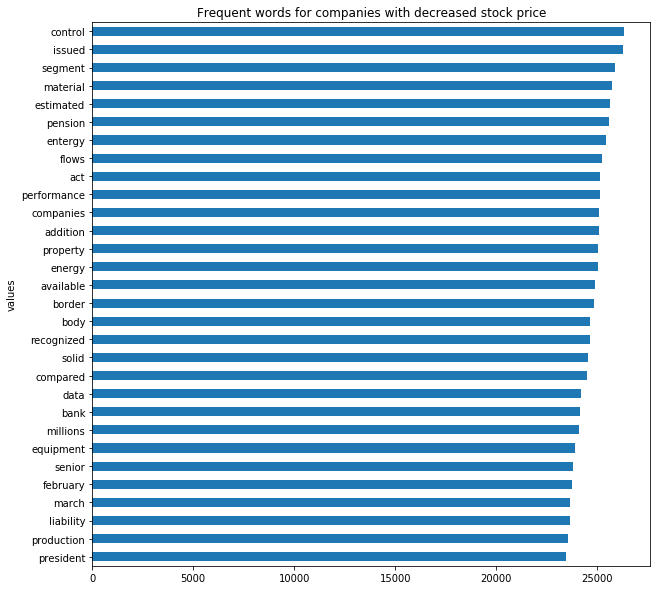

In [58]:
x.plot(kind='barh',figsize=(10,10),title="Frequent words for companies with decreased stock price")
plt.show()

In [0]:
y = vocab_frame_1.groupby('values')['counts'].mean().sort_values()

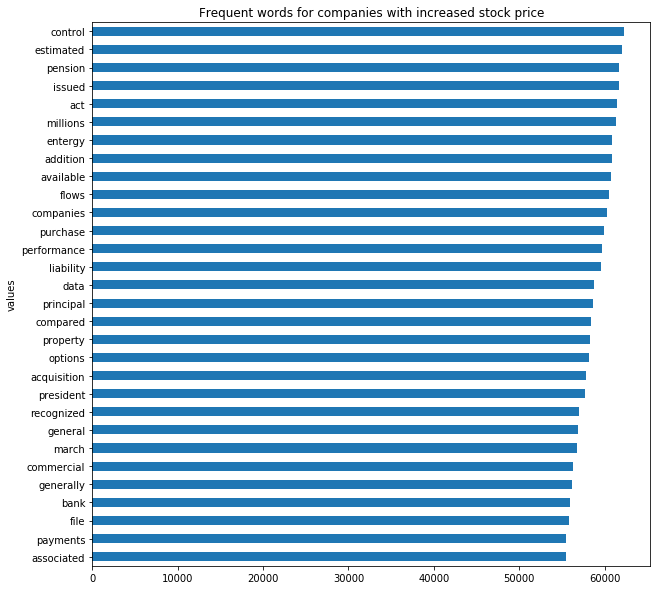

In [60]:
y.plot(kind='barh',figsize=(10,10),title="Frequent words for companies with increased stock price")
plt.show()

By plotting the above bar graph, which represents the top 7 frequent words.

### Rare words removal
Let’s remove rarely occurring words from the text. Because they’re so rare, 
the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [61]:
freq_train = pd.Series(' '.join(df_train['Extracted_data']).split()).value_counts()[-10:]

freq_test = pd.Series(' '.join(df_test['Extracted_data_test']).split()).value_counts()[-10:]
freq_test

reorganizational    1
mexicou             1
surging             1
naif                1
loancompletetm      1
amss                1
techni              1
hungrana            1
kingsdale           1
environmen          1
dtype: int64

In [63]:
# freq_train = list(freq_train.index)
# df_train['Extracted_data'] = df_train['Extracted_data'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
# df_train['Extracted_data'].head()

freq_test = list(freq_test.index)
df_test['Extracted_data_test'] = df_test['Extracted_data_test'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))
df_test['Extracted_data_test'].head()

0    form united states securities exchange commiss...
1    united states securities exchange commission w...
2    range resources corporation form pagebreak toc...
3    united states securities exchange commission w...
4    united states securities exchange commission w...
Name: Extracted_data_test, dtype: object

In [64]:
df_train.head()

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data,filing_year,char_count,word_count,numerics,clean_text,clean_without_stopwords,tokenized_sents
0,FE,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,public transitional http www org tr loose docu...,2012,1270734,222771,8731,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"[public, transitional, http, www, org, tr, loo..."
1,CL,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,public transitional http www org tr loose docu...,2015,338174,58015,2415,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"[public, transitional, http, www, org, tr, loo..."
2,PRU,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,public transitional http www org tr loose docu...,2016,1419638,231724,8398,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"[public, transitional, http, www, org, tr, loo..."
3,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,united states securities exchange commission w...,2001,365290,85444,684,united state security and exchange commission ...,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
4,CAM,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,vk pagebreak securities exchange commission wa...,2005,105838,18577,280,vk pagebreak security and exchange commission ...,vk pagebreak securities exchange commission wa...,"[vk, pagebreak, securities, exchange, commissi..."


## Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

#### N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

**Unigrams** do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library

In [0]:
words = [word for word in df_train['tokenized_sents']]

In [0]:
words_flat = [item for sublist in words for item in sublist]

In [67]:
print(words_flat[0:11])

['public', 'transitional', 'http', 'www', 'org', 'tr', 'loose', 'document', 'created', 'rights', 'reserved']


In [68]:
%%time
ngram_freq = nltk.FreqDist() # We initialized a frequency counter
# FreqDist gives the frequency of words within a text
for ngram in nltk.ngrams(words_flat, 2):
    ngram_freq[ngram] += 1

CPU times: user 1min 55s, sys: 67.3 ms, total: 1min 55s
Wall time: 1min 55s


In [69]:
ngram_freq.most_common(20)

[(('financial', 'statements'), 193304),
 (('fair', 'value'), 192917),
 (('colindex', 'type'), 172238),
 (('ended', 'december'), 158096),
 (('consolidated', 'financial'), 128431),
 (('million', 'million'), 127609),
 (('incorporated', 'reference'), 122758),
 (('year', 'ended'), 115224),
 (('common', 'stock'), 111991),
 (('long', 'term'), 103062),
 (('command', 'add_grid'), 86622),
 (('cash', 'flows'), 84476),
 (('net', 'income'), 82649),
 (('united', 'states'), 80331),
 (('pt', 'command'), 77139),
 (('results', 'operations'), 75784),
 (('report', 'form'), 70258),
 (('approximately', 'million'), 69626),
 (('income', 'taxes'), 68999),
 (('interest', 'rate'), 68087)]

In [104]:
# df_train.columns
df_train.columns

Index(['ticker', 'cik', 'filing_date', '10k_link', 'long_term_outlook',
       'Extracted_data', 'filing_year', 'char_count', 'word_count', 'numerics',
       'clean_text', 'clean_without_stopwords', 'tokenized_sents'],
      dtype='object')

In [0]:
pd.DataFrame(df_train).to_csv("train_data.csv",sep=',', columns=['ticker','cik','filing_date','10k_link','long_term_outlook','Extracted_data','filing_year',\
                                                          'char_count','word_count','numerics','clean_text','clean_without_stopwords','tokenized_sents'], header=True, index=False)

In [106]:
dtrain = pd.read_csv("train_data.csv", sep= ',')
dtrain.head()

# dtest = pd.read_csv("test_data.csv", sep= ',')
# dtest.head()

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data,filing_year,char_count,word_count,numerics,clean_text,clean_without_stopwords,tokenized_sents
0,FE,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,public transitional http www org tr loose docu...,2012,1270734,222771,8731,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"['public', 'transitional', 'http', 'www', 'org..."
1,CL,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,public transitional http www org tr loose docu...,2015,338174,58015,2415,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"['public', 'transitional', 'http', 'www', 'org..."
2,PRU,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,public transitional http www org tr loose docu...,2016,1419638,231724,8398,html public dtd html transitional en http www ...,public transitional http www org tr loose docu...,"['public', 'transitional', 'http', 'www', 'org..."
3,EBAY,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,united states securities exchange commission w...,2001,365290,85444,684,united state security and exchange commission ...,united states securities exchange commission w...,"['united', 'states', 'securities', 'exchange',..."
4,CAM,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,vk pagebreak securities exchange commission wa...,2005,105838,18577,280,vk pagebreak security and exchange commission ...,vk pagebreak securities exchange commission wa...,"['vk', 'pagebreak', 'securities', 'exchange', ..."


**Cleaned data with all above preprocessing steps**

In [0]:
data_train = pd.read_csv("/content/driver/My Drive/phd_data/train_data.csv")
data_test = pd.read_csv("/content/driver/My Drive/phd_data/test_data.csv")

In [110]:
data_train.describe(include='all')

,ticker,cik,filing_date,10k_link,long_term_outlook,Extracted_data,filing_year,char_count,word_count,numerics,clean_text,clean_without_stopwords,tokenized_sents
count,2568,2.568000e+03,2568,2568,2568.000000,2568,2568.000000,2.568000e+03,2568.000000,2568.000000,2568,2568,2568
unique,193,NaN,943,2568,NaN,2568,NaN,NaN,NaN,NaN,2568,2568,2568
top,TMK,NaN,2010-02-26,https://www.sec.gov/Archives/edgar/data/137894...,NaN,public transitional http www org tr loose docu...,NaN,NaN,NaN,NaN,form htm licensed to camintl document created ...,public transitional http www org tr loose docu...,"['adp_', 'htm', 'licensed', 'dg', 'docs', 'inc..."
freq,23,NaN,33,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1
mean,NaN,5.422306e+05,NaN,NaN,0.709112,NaN,2007.463396,4.153581e+05,92715.301012,1545.322040,NaN,NaN,NaN
std,NaN,4.642214e+05,NaN,NaN,0.454260,NaN,6.338047,3.161069e+05,76231.271227,1484.254922,NaN,NaN,NaN
min,NaN,4.281000e+03,NaN,NaN,0.000000,NaN,1994.000000,3.174400e+04,4984.000000,96.000000,NaN,NaN,NaN
25%,NaN,6.949900e+04,NaN,NaN,0.000000,NaN,2003.000000,2.052758e+05,46057.500000,582.250000,NaN,NaN,NaN
50%,NaN,7.136760e+05,NaN,NaN,1.000000,NaN,2008.000000,3.662725e+05,75903.500000,1164.000000,NaN,NaN,NaN
75%,NaN,9.061070e+05,NaN,NaN,1.000000,NaN,2013.000000,5.389160e+05,117461.750000,1975.250000,NaN,NaN,NaN


In [111]:
data_test.describe(include='all')

,id,ticker,cik,filing_date,10k_link,Extracted_data_test,filing_year,char_count,word_count,numerics,clean_text,clean_without_stopwords,tokenized_sents
count,856.000000,856,8.560000e+02,856,856,856,856.000000,8.560000e+02,856.000000,856.000000,856,856,856
unique,NaN,189,NaN,470,856,856,NaN,NaN,NaN,NaN,856,856,856
top,NaN,APA,NaN,2010-02-26,https://www.sec.gov/Archives/edgar/data/101896...,form united states securities exchange commiss...,NaN,NaN,NaN,NaN,unassociated document licensed to vf document ...,form united states securities exchange commiss...,"['securities', 'exchange', 'commission', 'wash..."
freq,NaN,10,NaN,13,1,1,NaN,NaN,NaN,NaN,1,1,1
mean,427.500000,NaN,5.394613e+05,NaN,NaN,NaN,2007.714953,4.131631e+05,91714.702103,1567.133178,NaN,NaN,NaN
std,247.250211,NaN,4.762792e+05,NaN,NaN,NaN,6.373231,3.028968e+05,75495.531303,1467.505147,NaN,NaN,NaN
min,0.000000,NaN,4.904000e+03,NaN,NaN,NaN,1994.000000,3.266300e+04,8534.000000,105.000000,NaN,NaN,NaN
25%,213.750000,NaN,6.270900e+04,NaN,NaN,NaN,2003.000000,2.125115e+05,43810.750000,577.000000,NaN,NaN,NaN
50%,427.500000,NaN,7.075490e+05,NaN,NaN,NaN,2008.000000,3.696745e+05,75770.500000,1208.000000,NaN,NaN,NaN
75%,641.250000,NaN,9.099540e+05,NaN,NaN,NaN,2013.000000,5.497365e+05,116063.250000,2010.750000,NaN,NaN,NaN


## Dropping Unnecessary Variables

In [0]:
data_test.drop(['ticker','cik','filing_date','10k_link','char_count','word_count','numerics','clean_text','clean_without_stopwords','Extracted_data_test'],\
                             inplace = True, axis=1)

In [0]:
data_train.drop(['ticker','cik','filing_date','10k_link','char_count','word_count','numerics','clean_text','clean_without_stopwords','Extracted_data'],\
                             inplace = True, axis=1)

In [114]:
data_test.head()

,id,filing_year,tokenized_sents
0,0,2012,"['form', 'united', 'states', 'securities', 'ex..."
1,1,1999,"['united', 'states', 'securities', 'exchange',..."
2,2,2001,"['range', 'resources', 'corporation', 'form', ..."
3,3,2009,"['united', 'states', 'securities', 'exchange',..."
4,4,2004,"['united', 'states', 'securities', 'exchange',..."


In [115]:
data_train.head()

,long_term_outlook,filing_year,tokenized_sents
0,0,2012,"['public', 'transitional', 'http', 'www', 'org..."
1,0,2015,"['public', 'transitional', 'http', 'www', 'org..."
2,1,2016,"['public', 'transitional', 'http', 'www', 'org..."
3,1,2001,"['united', 'states', 'securities', 'exchange',..."
4,1,2005,"['vk', 'pagebreak', 'securities', 'exchange', ..."


In [0]:
data_train['tokenized_sents'] = data_train['tokenized_sents'].astype('category')
data_test['tokenized_sents'] = data_test['tokenized_sents'].astype('category')

## Train-Validation Split

**Tried train validation split on train data which result in around 71% accuracy on SVM Model, but after using train , test data it result it into 71.84% using same model which hardly represent much increse.**

In [0]:
# X =data_train.loc[:,data_train.columns!="long_term_outlook"] # loc is used for names of the columns.iloc is used for row or column index
# y =data_test.loc[:,"long_term_outlook"]

# X_train, X_Val, y_train, y_Val= train_test_split(X,y,test_size=0.20,random_state=123)

In [0]:
# print(X_train.shape)
# print(X_Val.shape)
# print(y_train.shape)
# print(y_Val.shape)

In [118]:
 y_train=data_train.loc[:,"long_term_outlook"]
 y_train.shape

(2568,)

### Tfidfvectorizer aim to convert a collection of raw documents to a matrix of TF-IDF features.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer.fit(data_train['tokenized_sents'])


# # just send in all your docs here
Train_X_Tfidf = tfidf_vectorizer.transform(data_train['tokenized_sents'])
Test_X_Tfidf = tfidf_vectorizer.transform(data_test['tokenized_sents'])

In [1]:
#print(tfidf_vectorizer.vocabulary_)

In [123]:
# print(Train_X_Tfidf)
Train_X_Tfidf.shape

(2568, 89711)

In [124]:
# print(Test_X_Tfidf)
Test_X_Tfidf.shape

(856, 89711)

## Build SVM Model

In [0]:
from sklearn.svm import SVC # "Support Vector Classifier"

In [129]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Evaluate Model

In [0]:
# predict the labels on test dataset
predictions_SVM_test = SVM.predict(Test_X_Tfidf)
predictions_SVM_train = SVM.predict(Train_X_Tfidf)

In [132]:
print(len(predictions_SVM_test),len(predictions_SVM_train))

856 2568


In [133]:
# Use accuracy_score function to get the accuracy
from sklearn.metrics import accuracy_score
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_train, y_train)*100)

SVM Accuracy Score ->  72.0404984423676


In [134]:
predictions_SVM_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=predictions_SVM_train))

              precision    recall  f1-score   support

           0       0.76      0.06      0.10       747
           1       0.72      0.99      0.83      1821

    accuracy                           0.72      2568
   macro avg       0.74      0.52      0.47      2568
weighted avg       0.73      0.72      0.62      2568



In [0]:
# Final_PredResultsSVM = pd.DataFrame()
# sub_file = pd.read_csv('/content/driver/My Drive/phd_data/sample_submission-1570843559242.csv')
# Final_PredResultsSVM['id'] = sub_file['id']
# Final_PredResultsSVM['long_term_outlook'] = predictions_SVM_test
# Final_PredResultsSVM[['id','long_term_outlook']].to_csv('SVM_Submission.csv',index=False)

## Build Naive Bayes Model

In [137]:
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Train_X_Tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluate Model

In [0]:
# predict the labels on test dataset
predictions_NB_test = clf.predict(Test_X_Tfidf)
predictions_NB_train = clf.predict(Train_X_Tfidf)

In [139]:
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB_train, y_train)*100)

Naive Bayes Accuracy Score ->  70.91121495327103


In [140]:
predictions_NB_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=predictions_NB_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       747
           1       0.71      1.00      0.83      1821

    accuracy                           0.71      2568
   macro avg       0.35      0.50      0.41      2568
weighted avg       0.50      0.71      0.59      2568



## Build Logistic Model


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(Train_X_Tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluate Model

In [0]:
# predict the labels on test dataset
predictions_LR_test = logreg.predict(Test_X_Tfidf)
predictions_LR_train = logreg.predict(Train_X_Tfidf)

In [144]:
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_LR_train, y_train)*100)

Logistic Regression Accuracy Score ->  71.84579439252336


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=predictions_NB_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       747
           1       0.71      1.00      0.83      1821

    accuracy                           0.71      2568
   macro avg       0.35      0.50      0.41      2568
weighted avg       0.50      0.71      0.59      2568



## Build Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(Train_X_Tfidf,y_train)

### Evaluate Model

In [0]:
# predict the labels on test dataset
predictions_DC_test = clf.predict(Test_X_Tfidf)
predictions_DC_train = clf.predict(Train_X_Tfidf)

In [148]:
# Use accuracy_score function to get the accuracy
print("Decision tree Accuracy Score -> ",accuracy_score(predictions_DC_train, y_train)*100)

Decision tree Accuracy Score ->  100.0


In [149]:
predictions_DC_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=predictions_DC_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       747
           1       1.00      1.00      1.00      1821

    accuracy                           1.00      2568
   macro avg       1.00      1.00      1.00      2568
weighted avg       1.00      1.00      1.00      2568



In [0]:
# Final_PredResultsDC = pd.DataFrame()
# sub_file = pd.read_csv('/content/driver/My Drive/phd_data/sample_submission-1570843559242.csv')
# Final_PredResultsDC['id'] = sub_file['id']
# Final_PredResultsDC['long_term_outlook'] = predictions_DC_test
# Final_PredResultsDC[['id','long_term_outlook']].to_csv('DC_Submission.csv',index=False)

In [0]:
dict_data = pd.read_csv('/content/driver/My Drive/phd_data/finance_word_dictionary-1570171303593.csv')

In [152]:
dict_data.head()

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
0,AARDVARK,1,275,1.603442e-08,1.306189e-08,3.665256e-06,82,0,0,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.749209e-10,1.028197e-11,1.014208e-08,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,8,4.664558e-10,1.465871e-10,6.401309e-08,7,0,0,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,6,3.498419e-10,1.758203e-10,7.213526e-08,6,0,0,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,6729,3.923477e-07,3.752169e-07,3.452425e-05,845,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [153]:
dict_data.shape

(85221, 19)

In [154]:
dict_data.dtypes

Word                   object
Sequence Number         int64
Word Count              int64
Word Proportion       float64
Average Proportion    float64
Std Dev               float64
Doc Count               int64
Negative                int64
Positive                int64
Uncertainty             int64
Litigious               int64
Constraining            int64
Superfluous             int64
Interesting             int64
Modal                   int64
Irr_Verb                int64
Harvard_IV              int64
Syllables               int64
Source                 object
dtype: object

In [155]:
dict_data['Negative'].value_counts()

0    82866
1     2355
Name: Negative, dtype: int64

In [156]:
dict_data['Positive'].value_counts()

0    84867
1      354
Name: Positive, dtype: int64

In [157]:
Negative_Words = []
Negative_Words = dict_data.loc[dict_data['Negative'] == 1, 'Word']
Negative_Words.values

array(['ABANDON', 'ABANDONED', 'ABANDONING', ..., 'WRONGFUL',
       'WRONGFULLY', 'WRONGLY'], dtype=object)

In [158]:
Postive_Words = []
Postive_Words = dict_data.loc[dict_data['Positive'] == 1, 'Word']
Postive_Words.values

array(['ABLE', 'ABUNDANCE', 'ABUNDANT', 'ACCLAIMED', 'ACCOMPLISH',
       'ACCOMPLISHED', 'ACCOMPLISHES', 'ACCOMPLISHING', 'ACCOMPLISHMENT',
       'ACCOMPLISHMENTS', 'ACHIEVE', 'ACHIEVED', 'ACHIEVEMENT',
       'ACHIEVEMENTS', 'ACHIEVES', 'ACHIEVING', 'ADEQUATELY',
       'ADVANCEMENT', 'ADVANCEMENTS', 'ADVANCES', 'ADVANCING',
       'ADVANTAGE', 'ADVANTAGED', 'ADVANTAGEOUS', 'ADVANTAGEOUSLY',
       'ADVANTAGES', 'ALLIANCE', 'ALLIANCES', 'ASSURE', 'ASSURED',
       'ASSURES', 'ASSURING', 'ATTAIN', 'ATTAINED', 'ATTAINING',
       'ATTAINMENT', 'ATTAINMENTS', 'ATTAINS', 'ATTRACTIVE',
       'ATTRACTIVENESS', 'BEAUTIFUL', 'BEAUTIFULLY', 'BENEFICIAL',
       'BENEFICIALLY', 'BENEFIT', 'BENEFITED', 'BENEFITING', 'BENEFITTED',
       'BENEFITTING', 'BEST', 'BETTER', 'BOLSTERED', 'BOLSTERING',
       'BOLSTERS', 'BOOM', 'BOOMING', 'BOOST', 'BOOSTED', 'BREAKTHROUGH',
       'BREAKTHROUGHS', 'BRILLIANT', 'CHARITABLE', 'COLLABORATE',
       'COLLABORATED', 'COLLABORATES', 'COLLABORATING', 'COL

In [159]:
len(Negative_Words)

2355

In [160]:
len(Postive_Words)

354

In [161]:
data_test.head()

,id,filing_year,tokenized_sents
0,0,2012,"['form', 'united', 'states', 'securities', 'ex..."
1,1,1999,"['united', 'states', 'securities', 'exchange',..."
2,2,2001,"['range', 'resources', 'corporation', 'form', ..."
3,3,2009,"['united', 'states', 'securities', 'exchange',..."
4,4,2004,"['united', 'states', 'securities', 'exchange',..."


In [0]:
list1 = data_test['tokenized_sents']

In [0]:
import ast                           #to convert pandas series into list inside list

In [0]:
data_test['tokenized_sents_new'] = [ast.literal_eval(x) for x in list1]  # method successfully evaluates the string, and gets the Python dictionary object.

In [165]:
ll = data_test['tokenized_sents_new'][0]
len(ll)

24310

In [166]:
def unique(ll):
  x = np.array(ll) 
  print(len(np.unique(x)))
      
  
# driver code 
print("the unique values from 1st list is:") 
unique(ll)

the unique values from 1st list is:
3097


In [0]:
list2 = data_test['tokenized_sents_new']

In [0]:
lower_neg=[x.lower() for x in (Negative_Words.values)]
lower_pos=[x.lower() for x in (Postive_Words.values)]

In [170]:
list3 = lower_neg
len(list3)

2355

In [171]:
list4 = lower_pos
len(list4)

354

In [0]:
def intersection(list3, list2): 
    list4 = [list(filter(lambda x: x in list3, list(set(sublist)))) for sublist in list2]
    return list4

# Driver Code 
list5 = intersection(list3, list2)

In [0]:
def intersection(list4, list2): 
    list5 = [list(filter(lambda x: x in list4, list(set(sublist)))) for sublist in list2]
    return list5

# Driver Code 
list6 = intersection(list4, list2) 

In [0]:
data_test['Negative_Count'] = [len(x) for x in list5]
data_test['Positive_Count'] = [len(x) for x in list6]

In [175]:
data_test.head()

,id,filing_year,tokenized_sents,tokenized_sents_new,Negative_Count,Positive_Count
0,0,2012,"['form', 'united', 'states', 'securities', 'ex...","[form, united, states, securities, exchange, c...",126,76
1,1,1999,"['united', 'states', 'securities', 'exchange',...","[united, states, securities, exchange, commiss...",87,37
2,2,2001,"['range', 'resources', 'corporation', 'form', ...","[range, resources, corporation, form, pagebrea...",138,39
3,3,2009,"['united', 'states', 'securities', 'exchange',...","[united, states, securities, exchange, commiss...",165,67
4,4,2004,"['united', 'states', 'securities', 'exchange',...","[united, states, securities, exchange, commiss...",77,38


In [0]:
pd.DataFrame(data_test).to_csv("data_test_with_dict.csv",sep=',', columns=['id','tokenized_sents','tokenized_sents_new','Negative_Count','Positive_Count'], header=True, index=False)

In [0]:
dtest = pd.read_csv("data_test_with_dict.csv", sep= ',')

In [0]:
data_test_with_dict = pd.read_csv("/content/driver/My Drive/phd_data/data_test_with_dict.csv")

In [180]:
data_test_with_dict.head()

,id,tokenized_sents,tokenized_sents_new,Negative_Count,Positive_Count
0,0,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",126,76
1,1,"['united', 'states', 'securities', 'exchange',...","['united', 'states', 'securities', 'exchange',...",87,37
2,2,"['range', 'resources', 'corporation', 'form', ...","['range', 'resources', 'corporation', 'form', ...",138,39
3,3,"['united', 'states', 'securities', 'exchange',...","['united', 'states', 'securities', 'exchange',...",165,67
4,4,"['united', 'states', 'securities', 'exchange',...","['united', 'states', 'securities', 'exchange',...",77,38


In [0]:
q = data_test_with_dict['Negative_Count'].quantile(0.99)

In [182]:
q

337.9000000000001

In [183]:
data_test_with_dict[data_test_with_dict['Negative_Count']>q]

,id,tokenized_sents,tokenized_sents_new,Negative_Count,Positive_Count
94,94,"['form', 'pagebreak', 'united', 'states', 'sec...","['form', 'pagebreak', 'united', 'states', 'sec...",339,96
148,148,"['public', 'transitional', 'http', 'www', 'org...","['public', 'transitional', 'http', 'www', 'org...",381,87
256,256,"['united', 'states', 'securities', 'exchange',...","['united', 'states', 'securities', 'exchange',...",343,92
262,262,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",362,83
388,388,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",375,88
405,405,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",362,98
515,515,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",376,89
781,781,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",352,99
811,811,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",343,96


In [0]:
r = data_test_with_dict['Positive_Count'].quantile(0.99)

In [185]:
r

96.0

In [186]:
data_test_with_dict[data_test_with_dict['Positive_Count']>r]

,id,tokenized_sents,tokenized_sents_new,Negative_Count,Positive_Count
136,136,"['public', 'transitional', 'http', 'www', 'org...","['public', 'transitional', 'http', 'www', 'org...",333,103
331,331,"['cigna', 'corporation', 'form', 'united', 'st...","['cigna', 'corporation', 'form', 'united', 'st...",275,98
343,343,"['public', 'transitional', 'http', 'www', 'org...","['public', 'transitional', 'http', 'www', 'org...",179,98
405,405,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",362,98
519,519,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",323,100
746,746,"['public', 'transitional', 'http', 'www', 'org...","['public', 'transitional', 'http', 'www', 'org...",275,97
781,781,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",352,99
786,786,"['form', 'united', 'states', 'securities', 'ex...","['form', 'united', 'states', 'securities', 'ex...",332,98
